In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('./train.csv', parse_dates=["Dates"])
test = pd.read_csv('./test.csv', parse_dates=["Dates"])

In [3]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [4]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [6]:
train['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Crime Category')]

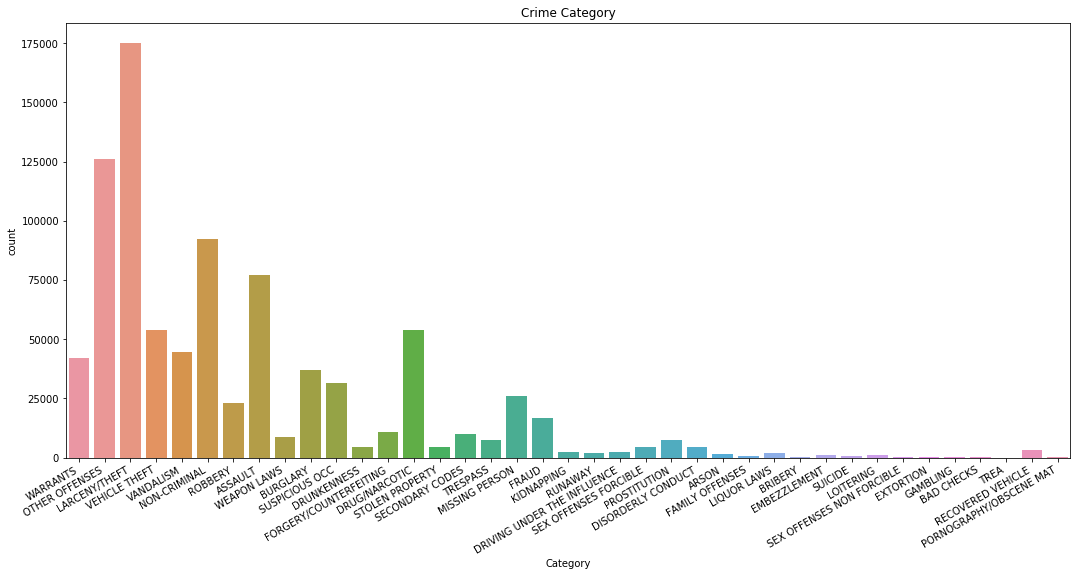

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, ax1 = plt.subplots()
figure.set_size_inches(18, 8)

#sns.barplot(data=train, x='Category', ax=ax1)
sns.countplot(x='Category', data=train, ax=ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='count', title='Crime Category')

In [8]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [9]:
test.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

In [10]:
print('Number of Categories: ', train.Category.nunique())
print('Number of PdDistricts: ', train.PdDistrict.nunique())
print('Number of DayOfWeeks: ', train.DayOfWeek.nunique())
print('_________________________________________________')
# Show some useful Information
train.info()

Number of Categories:  39
Number of PdDistricts:  10
Number of DayOfWeeks:  7
_________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


### how useful information (columns, types, number of rows)
#### Few important observations:
    We have 878049 Observations of 9 variables
    We have a 'Dates' column which contains the date and time of the occurence of the crime, but it's a String.
    We have spatial coordinates ( Latitude and Longitude ) of the exact place of the crime.
    The Target column is 'Category', which is a Categorical Column ( 39 categories )
    The 'DayOfWeek' column is also Categorical ( 7 days )
    The 'PdDistrict' column is also Categorical ( 10 districts )
    The 'Address' column indicates whether the crime location was an intersection of two roads
    The 'Resolution' column will be droped ( It won't help us with prediction )

### Quick Preprocessing & Feature Engineering


#### Drop the Resolution Column:

In [11]:
train = train.drop('Resolution', axis=1)
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541


### Engineer a feature to indicate whether the crime was commited by day or by night :

In [12]:
train['IsDay'] = 0
train.loc[(train['Dates'].dt.day>=6) & (train['Dates'].dt.hour <20), 'IsDay'] = 1

test['IsDay'] = 0
test.loc[(test['Dates'].dt.hour>=6) & (test['Dates'].dt.hour <20), 'IsDay'] = 1

train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,IsDay
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,0


In [13]:
train['IsDay'].value_counts()

1    582180
0    295869
Name: IsDay, dtype: int64

#### Encode 'DayOfWeek' to Integer

In [14]:
days_to_int_dic = {
        'Monday': 1,
        'Tuesday': 2,
        'Wednesday': 3,
        'Thursday': 4,
        'Friday': 5,
        'Saturday': 6,
        'Sunday': 7,
}

full_data = [train, test]

for dataset in full_data:
    dataset['DayOfWeek'] = dataset['DayOfWeek'].map(days_to_int_dic)


In [15]:
print(train['DayOfWeek'].value_counts())
train.head(10)

5    133734
3    129211
6    126810
4    125038
2    124965
1    121584
7    116707
Name: DayOfWeek, dtype: int64


,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,IsDay
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,3,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,0
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,3,INGLESIDE,0 Block of TEDDY AV,-122.403252,37.713431,0
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,3,INGLESIDE,AVALON AV / PERU AV,-122.423327,37.725138,0
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,3,BAYVIEW,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,0
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,RICHMOND,600 Block of 47TH AV,-122.508194,37.776601,0
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,CENTRAL,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,0


#### Create hour, month and year columns

In [16]:
for dataset in full_data:
    dataset['Hour'] = dataset['Dates'].dt.hour
    dataset['Month'] = dataset['Dates'].dt.month
    dataset['Year'] = dataset['Dates'].dt.year

In [17]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,IsDay,Hour,Month,Year
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,3,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,0,23,5,2015
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,0,23,5,2015
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,23,5,2015
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,0,23,5,2015
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,0,23,5,2015


#### Deal with the cyclic characteristic of Months and Days of Week:

In [18]:
import numpy as np

for dataset in full_data:
    dataset['HourCos'] = np.cos((dataset['Hour']*2*np.pi)/24 )
    dataset['DayOfWeekCos'] = np.cos((dataset['DayOfWeek']*2*np.pi)/7 )
    dataset['MonthCos'] = np.cos((dataset['Month']*2*np.pi)/12 )

train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address,X,Y,IsDay,Hour,Month,Year,HourCos,DayOfWeekCos,MonthCos
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,3,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,0,23,5,2015,0.965926,-0.900969,-0.866025
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,0,23,5,2015,0.965926,-0.900969,-0.866025
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,23,5,2015,0.965926,-0.900969,-0.866025
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873,0,23,5,2015,0.965926,-0.900969,-0.866025
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,PARK,100 Block of BRODERICK ST,-122.438738,37.771541,0,23,5,2015,0.965926,-0.900969,-0.866025


#### Dummy Encoding of 'PdDistrict':¶
#### pd.get_dummies() :: One-Hot Encoding

In [19]:
train = pd.get_dummies(train, columns=['PdDistrict'])
test  = pd.get_dummies(test,  columns=['PdDistrict'])

train.head()

,Dates,Category,Descript,DayOfWeek,Address,X,Y,IsDay,Hour,Month,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,3,OAK ST / LAGUNA ST,-122.425892,37.774599,0,23,5,...,0,0,0,0,1,0,0,0,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,OAK ST / LAGUNA ST,-122.425892,37.774599,0,23,5,...,0,0,0,0,1,0,0,0,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,23,5,...,0,0,0,0,1,0,0,0,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,1500 Block of LOMBARD ST,-122.426995,37.800873,0,23,5,...,0,0,0,0,1,0,0,0,0,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,100 Block of BRODERICK ST,-122.438738,37.771541,0,23,5,...,0,0,0,0,0,1,0,0,0,0


### Label Encoding of 'Category':
    change type categorical data to numeric data

In [20]:
from sklearn.preprocessing import LabelEncoder
category_label = LabelEncoder()

train['CategoryInt'] = pd.Series(category_label.fit_transform(train['Category']))

train.head()

,Dates,Category,Descript,DayOfWeek,Address,X,Y,IsDay,Hour,Month,...,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,CategoryInt
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,3,OAK ST / LAGUNA ST,-122.425892,37.774599,0,23,5,...,0,0,0,1,0,0,0,0,0,37
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,OAK ST / LAGUNA ST,-122.425892,37.774599,0,23,5,...,0,0,0,1,0,0,0,0,0,21
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,23,5,...,0,0,0,1,0,0,0,0,0,21
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,1500 Block of LOMBARD ST,-122.426995,37.800873,0,23,5,...,0,0,0,1,0,0,0,0,0,16
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,100 Block of BRODERICK ST,-122.438738,37.771541,0,23,5,...,0,0,0,0,1,0,0,0,0,16


In [21]:
train['InIntersection'] = 1
train.loc[train['Address'].str.contains('Block'), 'InIntersection'] = 0

test['InIntersetion'] = 1
test.loc[test['Address'].str.contains('Block'), 'InIntersection'] = 0

train.head()

,Dates,Category,Descript,DayOfWeek,Address,X,Y,IsDay,Hour,Month,...,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,CategoryInt,InIntersection
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,3,OAK ST / LAGUNA ST,-122.425892,37.774599,0,23,5,...,0,0,1,0,0,0,0,0,37,1
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,OAK ST / LAGUNA ST,-122.425892,37.774599,0,23,5,...,0,0,1,0,0,0,0,0,21,1
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,3,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,23,5,...,0,0,1,0,0,0,0,0,21,1
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,1500 Block of LOMBARD ST,-122.426995,37.800873,0,23,5,...,0,0,1,0,0,0,0,0,16,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,3,100 Block of BRODERICK ST,-122.438738,37.771541,0,23,5,...,0,0,0,1,0,0,0,0,16,0


### Feature Selection 
#### Now let's get our dataset ready for training !

In [22]:
train.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'Address', 'X', 'Y',
       'IsDay', 'Hour', 'Month', 'Year', 'HourCos', 'DayOfWeekCos', 'MonthCos',
       'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE',
       'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK',
       'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL',
       'PdDistrict_TENDERLOIN', 'CategoryInt', 'InIntersection'],
      dtype='object')

In [23]:
feature_cols = ['X', 'Y', 'IsDay', 'DayOfWeek', 'Month', 'Hour', 'Year', 'InIntersection',
                'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE',
                'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK',
                'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN']
target_cols = 'CategoryInt'

train_x = train[feature_cols]
train_y = train[target_cols]

test_id = test['Id']
test_x = test[feature_cols]

In [24]:
train_x.head()

,X,Y,IsDay,DayOfWeek,Month,Hour,Year,InIntersection,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.425892,37.774599,0,3,5,23,2015,1,0,0,0,0,1,0,0,0,0,0
1,-122.425892,37.774599,0,3,5,23,2015,1,0,0,0,0,1,0,0,0,0,0
2,-122.424363,37.800414,0,3,5,23,2015,1,0,0,0,0,1,0,0,0,0,0
3,-122.426995,37.800873,0,3,5,23,2015,0,0,0,0,0,1,0,0,0,0,0
4,-122.438738,37.771541,0,3,5,23,2015,0,0,0,0,0,0,1,0,0,0,0


In [25]:
train_y.head()

0    37
1    21
2    21
3    16
4    16
Name: CategoryInt, dtype: int64

In [26]:
test_x.head()

,X,Y,IsDay,DayOfWeek,Month,Hour,Year,InIntersection,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.399588,37.735051,0,7,5,23,2015,0.0,1,0,0,0,0,0,0,0,0,0
1,-122.391523,37.732432,0,7,5,23,2015,NaN,1,0,0,0,0,0,0,0,0,0
2,-122.426002,37.792212,0,7,5,23,2015,0.0,0,0,0,0,1,0,0,0,0,0
3,-122.437394,37.721412,0,7,5,23,2015,0.0,0,0,1,0,0,0,0,0,0,0
4,-122.437394,37.721412,0,7,5,23,2015,0.0,0,0,1,0,0,0,0,0,0,0


### XGBOOST Training (Cross-Validation):

In [27]:
type(train_x), type(train_y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

#### Import XGBoost and create the DMatrices

In [28]:
import xgboost as xgb
train_xgb = xgb.DMatrix(train_x, label=train_y)
test_xgb  = xgb.DMatrix(test_x)

In [29]:
type(train_xgb), type(test_xgb)

(xgboost.core.DMatrix, xgboost.core.DMatrix)

### Play with the parameters and do Cross-Validation

In [30]:
params = {
    'max_depth': 4,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 39,
}


In [31]:
CROSS_VAL = False
if CROSS_VAL:
    print('Doing Cross-validation ...')
    cv = xgb.cv(params, train_xgb, nfold=3, 
                early_stopping_rounds=10, metrics='mlogloss', verbose_eval=True)
    cv

### Fit & Make the predictions

In [32]:
SUBMIT = not CROSS_VAL
if SUBMIT:
    print('Fitting Model ...')
    m = xgb.train(params, train_xgb, 10)
    res = m.predict(test_xgb)
    cols = ['Id'] + category_label.classes_
    submission = pd.DataFrame(res, columns=category_label.classes_)
    submission.insert(0, 'Id', test_id)
    submission.to_csv('submission.csv', index=False)
    print('Done Outputing !')
    print(submission.sample(3))
else:
    print('NOT SUBMITING')

Fitting Model ...
Done Outputing !
            Id     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  \
858538  858538  0.005681  0.089062    0.005646  0.005022  0.047760   
466654  466654  0.006234  0.073967    0.005665  0.005581  0.058767   
602540  602540  0.005373  0.061945    0.005408  0.004761  0.068569   

        DISORDERLY CONDUCT  DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  \
858538            0.006442                     0.005152       0.029958   
466654            0.007158                     0.005725       0.028224   
602540            0.009018                     0.004934       0.014596   

        DRUNKENNESS  ...  SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY  \
858538     0.005912  ...                   0.004991         0.007316   
466654     0.008135  ...                   0.005546         0.007776   
602540     0.006831  ...                   0.004693         0.007596   

         SUICIDE  SUSPICIOUS OCC      TREA  TRESPASS  VANDALISM  \
858538  0.005434        0.04028

<img src="./score_xgb.png">

In [34]:
1272/2332

0.5454545454545454